# Operational Chroma Scan

In [1]:
import imageio
import pickle
import pandas as pd
import numpy as np
import PyNAFF as pnf
import scipy.io as sio 
import matplotlib.cm as cm
from math import log10, floor
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.patches import Patch
from scipy.optimize import curve_fit

In [2]:
plt.rcParams['figure.figsize'] = [5.0, 5.0]
plt.rcParams['figure.dpi'] = 200
plt.rcParams['savefig.dpi'] = 200

plt.rcParams['font.size'] = 10
plt.rcParams['legend.fontsize'] = 'small'
plt.rcParams['lines.linewidth'] = 1

## Function declarations

In [3]:
def harmonic_fn(x, a, b, c, d):
    return a + b*np.cos(c + 2*np.pi*d*x)

In [4]:
def quadratic(x, a, m, c):
    return a*x**2 + x*m + c

In [5]:
def cubic(x, a, m, c, b):
    return a*x**2 + x*m + c + b*x**3

In [6]:
def Md_fit(x, a, b, c, d):
        return a + b*np.cos(c*x+d)

In [7]:
def Md_ramp_fit(x, a, b, c, d):
    return a + b*(x-1)*np.cos(c*(x-1)+d)

In [8]:
def round_sig(x, sig=4):
    return round(x, sig-int(floor(log10(abs(x))))-1)

In [9]:
def add_input_file(dd, filename, label):
	f = filename
	p = dict()
	sio.loadmat(f, mdict=p)
	dd[label] = p
	print '\tAdded output data from ', filename, '\t dictionary key: ', label
	return dd

## Load bunch data

In [10]:
load_bunch_data = False

In [11]:
if load_bunch_data:
    # We have 7 simulations per scan 
    dd = dict()

    maxi = 30
    turns = range(0, maxi)
    print turns

    folders = []
    folders.append('01_01')
    folders.append('01_02')
    folders.append('01_03')
    folders.append('01_04')
    folders.append('01_05')
    folders.append('01_06')
    folders.append('01_07')

    for fol in folders:
        dd_temp = dict()
        for t in turns:
            if t <= 9:    inputs = str(fol + '/bunch_output/mainbunch_00000' + str(int(t)) + '.mat')
            else:    inputs = str(fol + '/bunch_output/mainbunch_0000' + str(int(t)) + '.mat')
            #print inputs
            dd_temp = add_input_file(dd_temp, inputs, t+1)
        dd_temp = add_input_file(dd_temp, str(fol + '/bunch_output/mainbunch_-000001.mat'), 0)
        dd[int(fol[3:5])] = dd_temp

    print sorted(dd.keys())
    
    # access all particle x co-ordinates like this
    print dd[1][0]['particles']['dE'][0][0][0]

# Load output data

In [12]:
ddo = dict()
ddo = add_input_file(ddo, '01_01/output/output.mat', -2.5E-3)
ddo = add_input_file(ddo, '01_02/output/output.mat', -2E-3)
ddo = add_input_file(ddo, '01_03/output/output.mat', -1E-3)
ddo = add_input_file(ddo, '01_04/output/output.mat', 0)
ddo = add_input_file(ddo, '01_05/output/output.mat', 1E-3)
ddo = add_input_file(ddo, '01_06/output/output.mat', 2E-3)
ddo = add_input_file(ddo, '01_07/output/output.mat', 2.5E-3)

	Added output data from  01_01/output/output.mat 	 dictionary key:  -0.0025
	Added output data from  01_02/output/output.mat 	 dictionary key:  -0.002
	Added output data from  01_03/output/output.mat 	 dictionary key:  -0.001
	Added output data from  01_04/output/output.mat 	 dictionary key:  0
	Added output data from  01_05/output/output.mat 	 dictionary key:  0.001
	Added output data from  01_06/output/output.mat 	 dictionary key:  0.002
	Added output data from  01_07/output/output.mat 	 dictionary key:  0.0025


# Plot and name parameters etc

In [13]:
save_folder = 'Plots/Operational/Simple_0_offset/'
CO_offset = '0'

sc = 'NoSC_NoRF'
legend_label = r'$\frac{\delta p}{p_0}$'
main_label = 'OP_Chroma'
main_label2 = main_label + '_zoom'
scaled_label = main_label + '_scaled'
turn_tot = 2200
zoom_turns = 15
turns = [0, 1, 10, 50, 100, 874, 2185, 2199]
betagamma = 2.492104532 * 0.9159915293879255

In [14]:
ddo[0].keys()

['eps_z',
 'D_x',
 'D_y',
 'kurtosis_yp_6sig',
 'kurtosis_yp',
 'mu_yp',
 'kurtosis_z_6sig',
 'eff_beta_y',
 'eff_beta_x',
 'eff_alpha_y',
 'kurtosis_y_6sig',
 'epsn_y',
 'epsn_x',
 'beta_y',
 'beta_x',
 'dpp_rms',
 'sig_yp',
 'min_dE',
 'orbit_x_max',
 'turn_time',
 'n_mp',
 'min_xp',
 'orbit_x_min',
 'kurtosis_y',
 'kurtosis_xp_6sig',
 'alpha_x',
 'alpha_y',
 'bunchlength',
 '__header__',
 'sig_xp',
 'kurtosis_dE_6sig',
 'max_xp',
 'intensity',
 'min_yp',
 'sig_dE',
 'min_x',
 'min_y',
 'mu_y',
 'mu_x',
 'cumulative_time',
 'mean_yp',
 'kurtosis_xp',
 'eff_epsn_y',
 'eff_epsn_x',
 'mean_x',
 'mean_y',
 'mean_z',
 'kurtosis_x_6sig',
 '__version__',
 'max_z',
 'mu_dE',
 'max_x',
 'max_y',
 'mean_dE',
 'sig_z',
 'sig_y',
 'sig_x',
 'max_yp',
 'kurtosis_z',
 'eff_alpha_x',
 'kurtosis_x',
 'mu_xp',
 'turn_duration',
 'mu_z',
 'mean_xp',
 'min_z',
 'kurtosis_dE',
 'orbit_y_max',
 'orbit_y_min',
 '__globals__',
 'turn',
 'max_dE',
 'gamma']

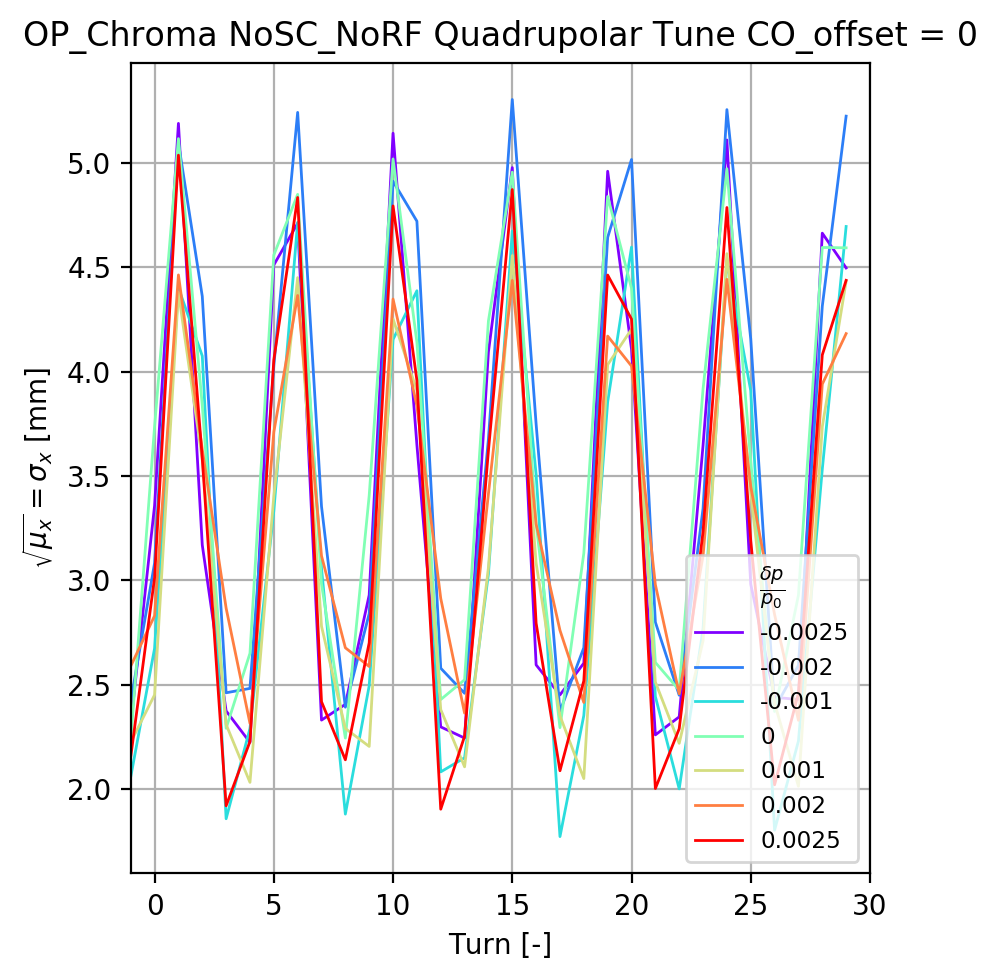

In [15]:
parameter = 'mu_x'

fig1 = plt.figure(facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)

tit = main_label + ' ' + sc + ' Quadrupolar Tune CO_offset = ' + CO_offset
ax1.set_title(tit);

ax1.set_ylabel(r'$\sqrt{\mu_x} = \sigma_x$ [mm]');
ax1.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(ddo.keys())))
c_it = int(0)

for key, value in sorted(ddo.iteritems()):
        ax1.plot(ddo[key]['turn'][0], np.sqrt(ddo[key][parameter][0])*1000, label=key, color=colors[c_it]);
        c_it = c_it + 1
        
ax1.legend(fontsize='small', loc=4, title=legend_label)
ax1.grid()
ax1.set_xlim(-1,30)

savename = save_folder + 'sig_x.png'
plt.tight_layout()
#plt.savefig(savename, dpi = 800);

# Save frequencies using different methods

In [16]:
qx_harmonic = []
qy_harmonic = []

qx_fft = []
qy_fft = []

qx_naff = []
qy_naff = []


 Momentum Offset =  -0.0025
 Offset =  3.3882733649530183  mm
 Amplitude =  1.4838365872027173  mm
 Frequency =  0.5007
 Phase offset =  0.2431041813098299

 Momentum Offset =  -0.002
 Offset =  3.6258061410954388  mm
 Amplitude =  1.4665540835034752  mm
 Frequency =  0.4993
 Phase offset =  0.26110264380909015

 Momentum Offset =  -0.001
 Offset =  3.139358812896085  mm
 Amplitude =  1.4722606652984387  mm
 Frequency =  0.4988
 Phase offset =  0.26964982226762685

 Momentum Offset =  0
 Offset =  3.587188803836551  mm
 Amplitude =  1.4432316603478614  mm
 Frequency =  0.4995
 Phase offset =  0.2603684323478101

 Momentum Offset =  0.001
 Offset =  3.100938369153058  mm
 Amplitude =  1.274056559545627  mm
 Frequency =  0.5001
 Phase offset =  0.25044868733830833

 Momentum Offset =  0.002
 Offset =  3.3175049222172075  mm
 Amplitude =  1.0742442723979726  mm
 Frequency =  0.5006
 Phase offset =  0.24207184527745534

 Momentum Offset =  0.0025
 Offset =  3.230059179391253  mm
 Amplitud

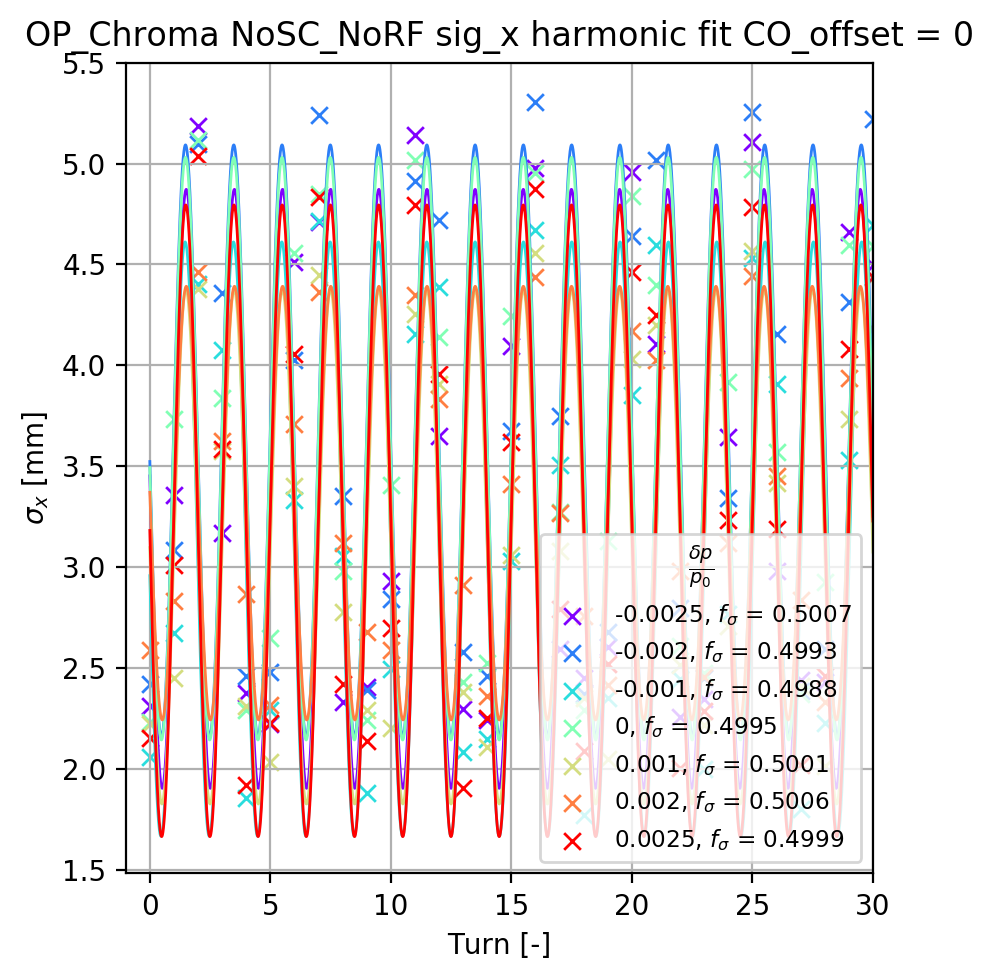

In [17]:
parameter = 'sig_x'

fig1 = plt.figure(facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)

tit = main_label + ' ' + sc + ' ' + parameter + ' harmonic fit CO_offset = ' + CO_offset
ax1.set_title(tit);

ax1.set_ylabel(r'$\sigma_x$ [mm]');
ax1.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(ddo.keys())))
c_it = int(0)
y_fine = np.array(range(0, 30000))*0.001
#print y_fine

for key, value in sorted(ddo.iteritems()):
#key=0

    y = np.array(range(0, 31))
    x = np.array(ddo[key][parameter][0]*1E3)

    mean_x = np.mean(x)    
    if mean_x < 0.0 :
        offset_min = 1.5 * np.mean(x)
        offset_max = 0.5 * np.mean(x)
    else:
        offset_min = 0.5 * np.mean(x)
        offset_max = 1.5 * np.mean(x)    

    amp_min = 0.5 * 0.999 * (np.max(x) - np.min(x))
    amp_max = 0.5 * 1.001 * (np.max(x) - np.min(x))

    freq_min = 0.0
    freq_max = 0.99

    popt, pcov = curve_fit(harmonic_fn, ddo[key]['turn'][0]+1, x, method = 'trf', bounds =((offset_min,amp_min,-np.inf,freq_min),(offset_max,amp_max,np.inf,freq_max)))

    print '\n Momentum Offset = ', key
    print ' Offset = ', popt[0], ' mm'
    print ' Amplitude = ', popt[1], ' mm'
    print ' Frequency = ', round(popt[3],4)
    print ' Phase offset = ', popt[2] / (2*np.pi)

    ax1.plot(y_fine, harmonic_fn(y_fine, popt[0], popt[1], popt[2], popt[3]), color=colors[c_it])
    lab_ = str(str(key) + r', $f_{\sigma}$ = ' + str(round(popt[3],4)))
    ax1.scatter(ddo[key]['turn'][0]+1, x, label=lab_, color=colors[c_it], marker='x');
    c_it = c_it + 1
    
    #qy_harmonic.append(popt[3])
        
ax1.legend(fontsize='small', loc=4, title=legend_label)
ax1.grid()
ax1.set_xlim(-1,30);
#ax1.set_ylim(-2,2);

savename = save_folder + 'qx_quadrupolar_harmonic.png'
plt.tight_layout()
plt.savefig(savename, dpi = 800);


 Momentum Offset =  -0.0025
 Offset =  3.4174823670213397  mm
 Amplitude =  0.28741403502854257  mm
 Frequency =  0.4911
 Phase offset =  0.3612809359980864

 Momentum Offset =  -0.002
 Offset =  2.852165767514852  mm
 Amplitude =  0.3662299574653463  mm
 Frequency =  0.4832
 Phase offset =  0.31123798097236166

 Momentum Offset =  -0.001
 Offset =  3.7383605701786324  mm
 Amplitude =  0.2843766573461056  mm
 Frequency =  0.5047
 Phase offset =  0.22361235097116308

 Momentum Offset =  0
 Offset =  2.821546416145163  mm
 Amplitude =  0.3166058925526679  mm
 Frequency =  0.517
 Phase offset =  0.003966626742872718

 Momentum Offset =  0.001
 Offset =  2.896030299378921  mm
 Amplitude =  0.36136201002417057  mm
 Frequency =  0.5119
 Phase offset =  0.3722046424331015

 Momentum Offset =  0.002
 Offset =  3.1814413696372164  mm
 Amplitude =  0.4653784268155022  mm
 Frequency =  0.5109
 Phase offset =  0.1058045291448795

 Momentum Offset =  0.0025
 Offset =  2.6854856636576585  mm
 Ampli

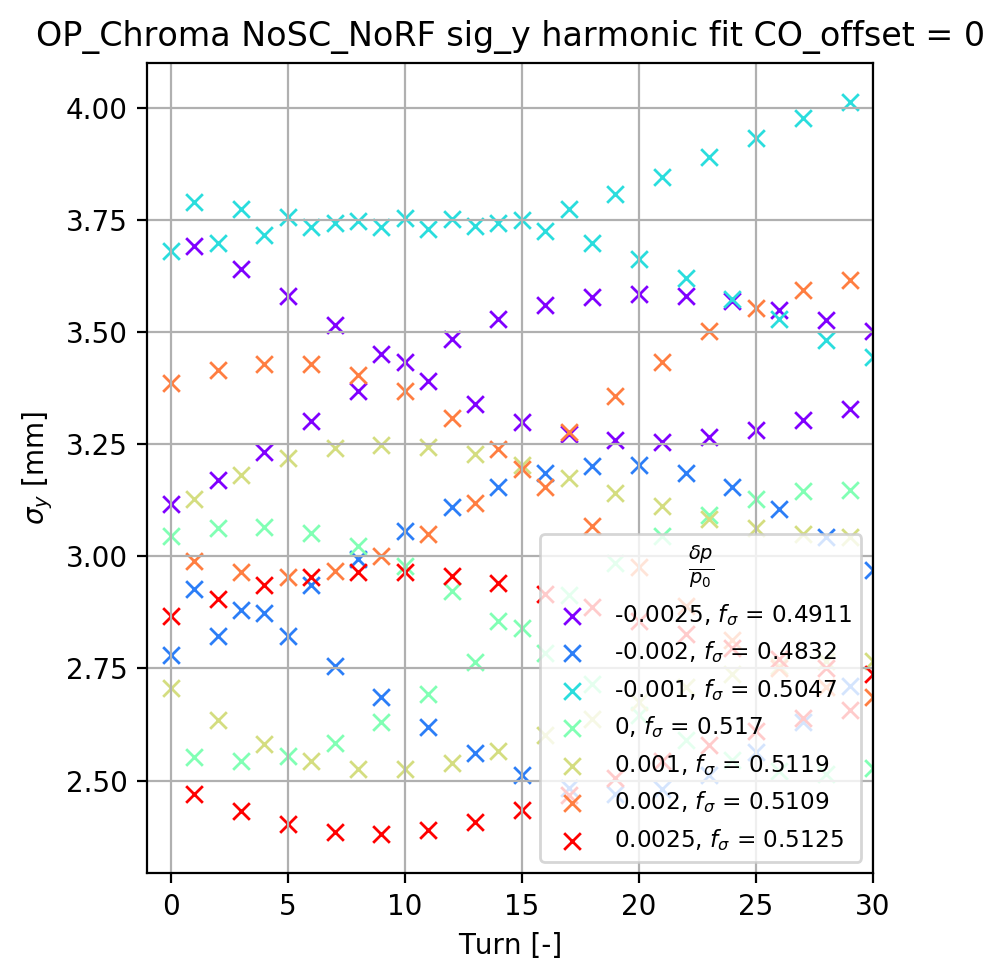

In [18]:
parameter = 'sig_y'

fig1 = plt.figure(facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)

tit = main_label + ' ' + sc + ' ' + parameter + ' harmonic fit CO_offset = ' + CO_offset
ax1.set_title(tit);

ax1.set_ylabel(r'$\sigma_y$ [mm]');
ax1.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(ddo.keys())))
c_it = int(0)
y_fine = np.array(range(0, 30000))*0.001
#print y_fine

for key, value in sorted(ddo.iteritems()):
#key=0

    y = np.array(range(0, 31))
    x = np.array(ddo[key][parameter][0]*1E3)

    mean_x = np.mean(x)
    if mean_x < 0.0 :
        offset_min = 1.5 * np.mean(x)
        offset_max = 0.5 * np.mean(x)
    else:
        offset_min = 0.5 * np.mean(x)
        offset_max = 1.5 * np.mean(x)    

    amp_min = 0.5 * 0.999 * (np.max(x) - np.min(x))
    amp_max = 0.5 * 1.001 * (np.max(x) - np.min(x))

    freq_min = 0.0
    freq_max = 0.99

    popt, pcov = curve_fit(harmonic_fn, ddo[key]['turn'][0]+1, x, method = 'trf', bounds =((offset_min,amp_min,-np.inf,freq_min),(offset_max,amp_max,np.inf,freq_max)))

    print '\n Momentum Offset = ', key
    print ' Offset = ', popt[0], ' mm'
    print ' Amplitude = ', popt[1], ' mm'
    print ' Frequency = ', round(popt[3],4)
    print ' Phase offset = ', popt[2] / (2*np.pi)

    #ax1.plot(y_fine, harmonic_fn(y_fine, popt[0], popt[1], popt[2], popt[3]), color=colors[c_it])
    lab_ = str(str(key) + r', $f_{\sigma}$ = ' + str(round(popt[3],4)))
    ax1.scatter(ddo[key]['turn'][0]+1, x, label=lab_, color=colors[c_it], marker='x');
    c_it = c_it + 1
    
    #qy_harmonic.append(popt[3])
        
ax1.legend(fontsize='small', loc=4, title=legend_label)
ax1.grid()
ax1.set_xlim(-1,30);
#ax1.set_ylim(-2,2);

savename = save_folder + 'qy_quadrupolar_harmonic.png'
plt.tight_layout()
plt.savefig(savename, dpi = 800);


 Momentum Offset =  -0.0025
 Offset =  -0.36883709858280395  mm
 Amplitude =  0.5668135444454568  mm
 Frequency =  0.221
 Phase offset =  0.4690795448196986

 Momentum Offset =  -0.002
 Offset =  -0.7278459471405997  mm
 Amplitude =  0.41197750532815863  mm
 Frequency =  0.222
 Phase offset =  0.3760961156376333

 Momentum Offset =  -0.001
 Offset =  -1.1317249104654514  mm
 Amplitude =  1.1027771143955225  mm
 Frequency =  0.2176
 Phase offset =  -0.14209400301110858

 Momentum Offset =  0
 Offset =  -0.7935967545187239  mm
 Amplitude =  0.20468858004906612  mm
 Frequency =  0.2101
 Phase offset =  0.19868869503171735

 Momentum Offset =  0.001
 Offset =  -0.9356277437314722  mm
 Amplitude =  0.6446646067031485  mm
 Frequency =  0.2163
 Phase offset =  -0.00020980151082367545

 Momentum Offset =  0.002
 Offset =  -1.0083985896990855  mm
 Amplitude =  0.8873393575932647  mm
 Frequency =  0.2186
 Phase offset =  -0.28167405708609383

 Momentum Offset =  0.0025
 Offset =  -0.88194176839

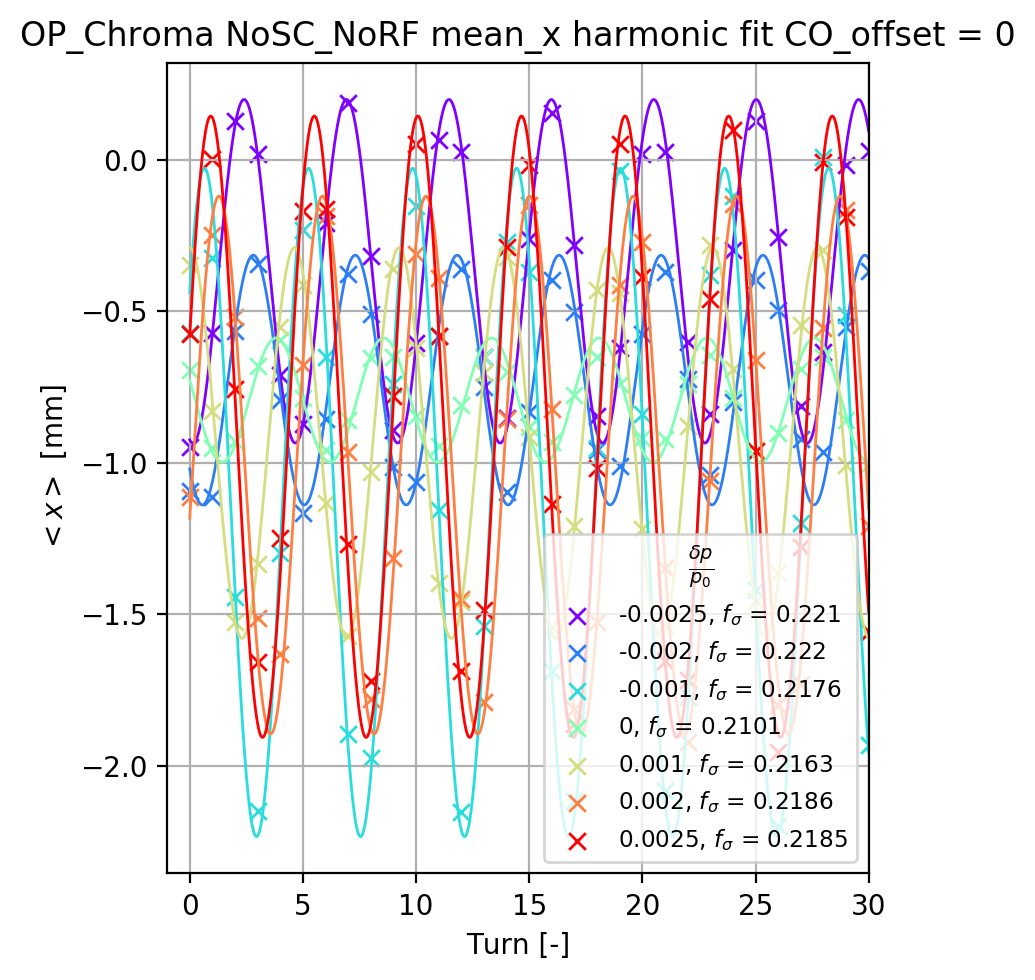

In [19]:
parameter = 'mean_x'

fig1 = plt.figure(facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)

tit = main_label + ' ' + sc + ' ' + parameter + ' harmonic fit CO_offset = ' + CO_offset
ax1.set_title(tit);

ax1.set_ylabel(r'$<x>$ [mm]');
ax1.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(ddo.keys())))
c_it = int(0)
y_fine = np.array(range(0, 30000))*0.001
#print y_fine

for key, value in sorted(ddo.iteritems()):
#key=0

    y = np.array(range(0, 31))
    x = np.array(ddo[key][parameter][0]*1E3)

    mean_x = np.mean(x)
    if mean_x < 0.0 :
        offset_min = 1.5 * np.mean(x)
        offset_max = 0.5 * np.mean(x)
    else:
        offset_min = 0.5 * np.mean(x)
        offset_max = 1.5 * np.mean(x)    

    amp_min = 0.5 * 0.999 * (np.max(x) - np.min(x))
    amp_max = 0.5 * 1.001 * (np.max(x) - np.min(x))

    freq_min = 0.21
    freq_max = 0.23

    popt, pcov = curve_fit(harmonic_fn, ddo[key]['turn'][0]+1, x, method = 'trf', bounds =((offset_min,amp_min,-np.inf,freq_min),(offset_max,amp_max,np.inf,freq_max)))

    print '\n Momentum Offset = ', key
    print ' Offset = ', popt[0], ' mm'
    print ' Amplitude = ', popt[1], ' mm'
    print ' Frequency = ', round(popt[3],4)
    print ' Phase offset = ', popt[2] / (2*np.pi)

    ax1.plot(y_fine, harmonic_fn(y_fine, popt[0], popt[1], popt[2], popt[3]), color=colors[c_it])
    lab_ = str(str(key) + r', $f_{\sigma}$ = ' + str(round(popt[3],4)))
    ax1.scatter(ddo[key]['turn'][0]+1, x, label=lab_, color=colors[c_it], marker='x');
    c_it = c_it + 1
    
    qx_harmonic.append(popt[3])
        
ax1.legend(fontsize='small', loc=4, title=legend_label)
ax1.grid()
ax1.set_xlim(-1,30);
#ax1.set_ylim(-2,2);

savename = save_folder + 'qx_harmonic.png'
plt.tight_layout()
plt.savefig(savename, dpi = 800);


 Momentum Offset =  -0.0025
 Offset =  -0.0058222769338718144  mm
 Amplitude =  0.35231907076705554  mm
 Frequency =  0.2433
 Phase offset =  0.4228331512262154

 Momentum Offset =  -0.002
 Offset =  0.003634397487828409  mm
 Amplitude =  0.4146382967744031  mm
 Frequency =  0.2444
 Phase offset =  0.64842320275531

 Momentum Offset =  -0.001
 Offset =  -0.008910986151988024  mm
 Amplitude =  0.4492879308168154  mm
 Frequency =  0.2427
 Phase offset =  0.3259150565973122

 Momentum Offset =  0
 Offset =  -0.01299293434789185  mm
 Amplitude =  0.9338935330070587  mm
 Frequency =  0.2434
 Phase offset =  0.21377202602633139

 Momentum Offset =  0.001
 Offset =  -0.001913767268373968  mm
 Amplitude =  0.18002679886947678  mm
 Frequency =  0.2341
 Phase offset =  0.30685664309664457

 Momentum Offset =  0.002
 Offset =  -0.009050614299287055  mm
 Amplitude =  0.42542284589834367  mm
 Frequency =  0.2416
 Phase offset =  0.37178361189219294

 Momentum Offset =  0.0025
 Offset =  0.00587953

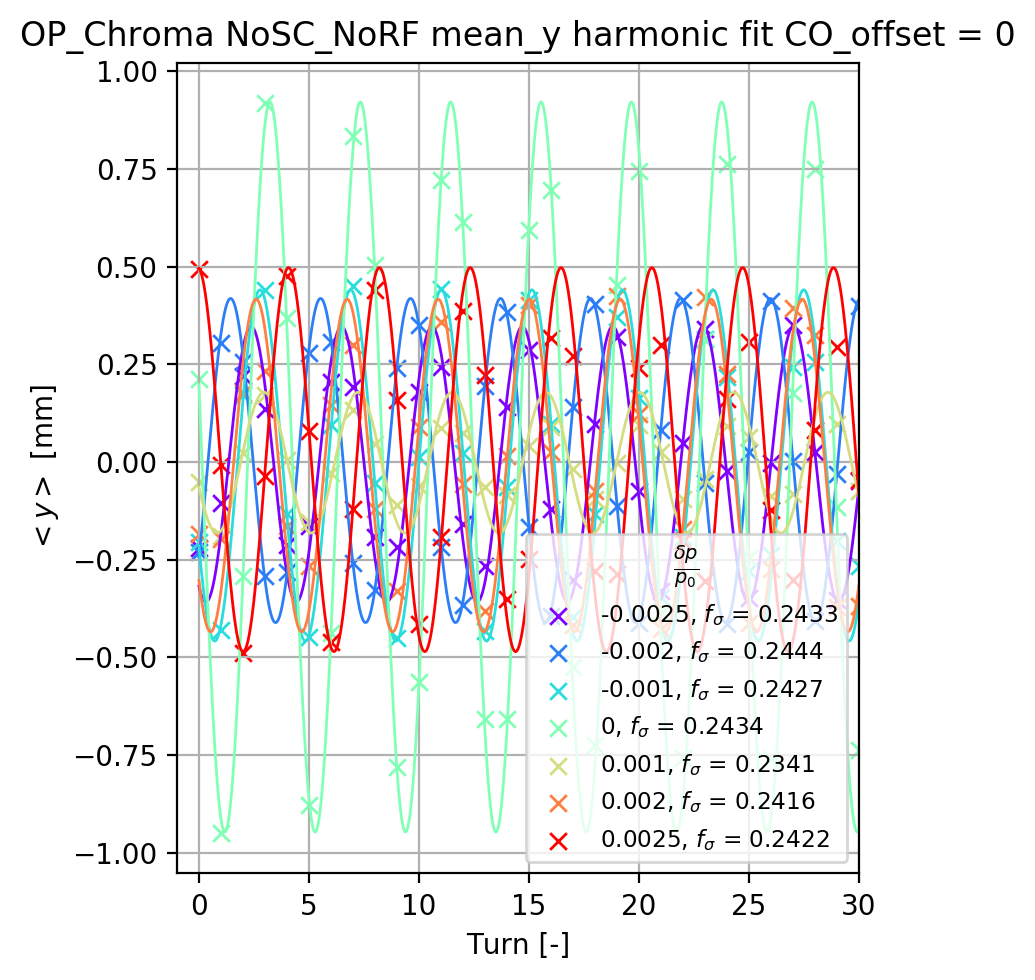

In [20]:
parameter = 'mean_y'

fig1 = plt.figure(facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)

tit = main_label + ' ' + sc + ' ' + parameter + ' harmonic fit CO_offset = ' + CO_offset
ax1.set_title(tit);

ax1.set_ylabel(r'$<y>$ [mm]');
ax1.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(ddo.keys())))
c_it = int(0)
y_fine = np.array(range(0, 30000))*0.001
#print y_fine

for key, value in sorted(ddo.iteritems()):
#key=0

    y = np.array(range(0, 31))
    x = np.array(ddo[key][parameter][0]*1E3)

    mean_x = np.mean(x)
    if mean_x < 0.0 :
        offset_min = 1.5 * np.mean(x)
        offset_max = 0.5 * np.mean(x)
    else:
        offset_min = 0.5 * np.mean(x)
        offset_max = 1.5 * np.mean(x)    

    amp_min = 0.5 * 0.999 * (np.max(x) - np.min(x))
    amp_max = 0.5 * 1.001 * (np.max(x) - np.min(x))

    freq_min = 0.0
    freq_max = 0.499

    popt, pcov = curve_fit(harmonic_fn, ddo[key]['turn'][0]+1, x, method = 'trf', bounds =((offset_min,amp_min,-np.inf,freq_min),(offset_max,amp_max,np.inf,freq_max)))

    print '\n Momentum Offset = ', key
    print ' Offset = ', popt[0], ' mm'
    print ' Amplitude = ', popt[1], ' mm'
    print ' Frequency = ', round(popt[3],4)
    print ' Phase offset = ', popt[2] / (2*np.pi)

    ax1.plot(y_fine, harmonic_fn(y_fine, popt[0], popt[1], popt[2], popt[3]), color=colors[c_it])
    lab_ = str(str(key) + r', $f_{\sigma}$ = ' + str(round(popt[3],4)))
    ax1.scatter(ddo[key]['turn'][0]+1, x, label=lab_, color=colors[c_it], marker='x');
    c_it = c_it + 1
    
    qy_harmonic.append(popt[3])
        
ax1.legend(fontsize='small', loc=4, title=legend_label)
ax1.grid()
ax1.set_xlim(-1,30);
#ax1.set_ylim(-2,2);

savename = save_folder + 'qy_harmonic.png'
plt.tight_layout()
plt.savefig(savename, dpi = 800);

/usr/lib64/python2.7/site-packages/scipy/optimize/minpack.py:785: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


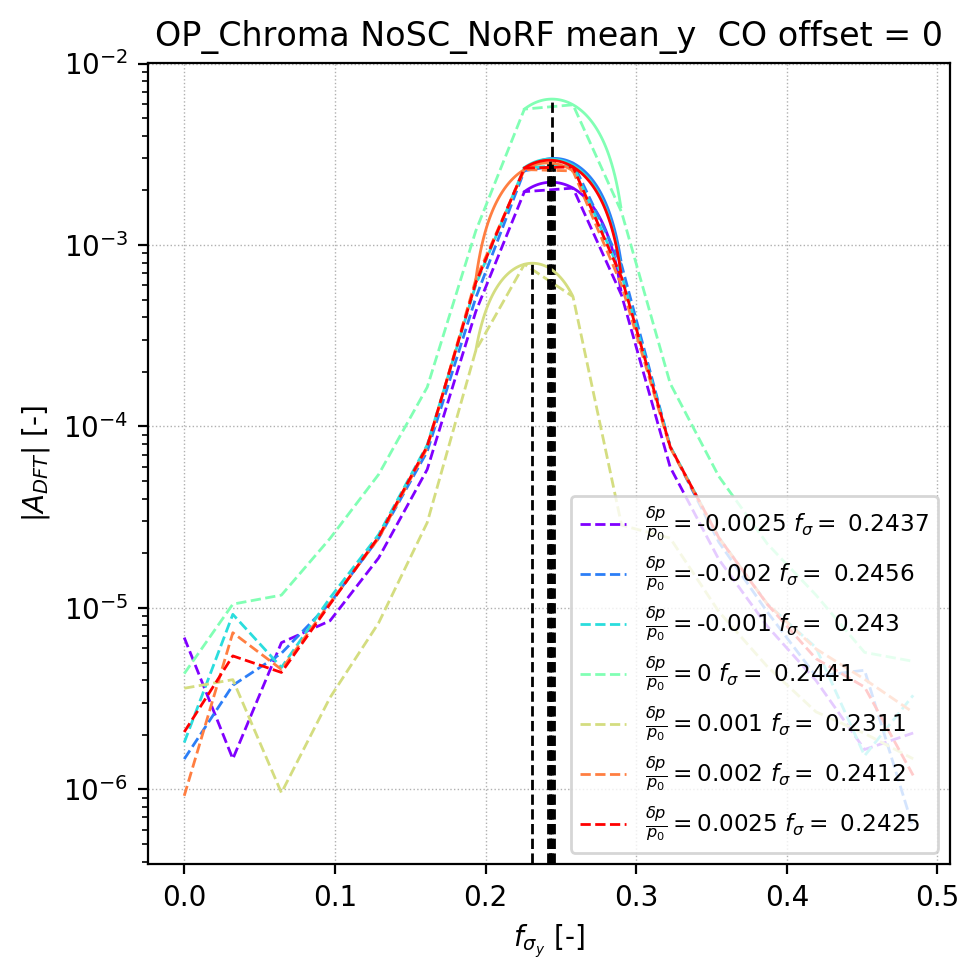

In [21]:
# Store envelope oscillation frequencies
f_sig_y = []

fig1 = plt.figure(facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)

tit = main_label + ' ' + sc + ' mean_y  CO offset = ' + CO_offset
ax1.set_title(tit);

ax1.set_ylabel(r'$|A_{DFT}|$ [-]');
ax1.set_xlabel(r'$f_{\sigma_{y}}$ [-]');

N_turns = 31

hann=np.hanning(N_turns)
freq_h = np.fft.rfftfreq(N_turns)

colors = cm.rainbow(np.linspace(0, 1, len(ddo.keys())))
c_it = int(0)

for key, value in sorted(ddo.iteritems()):

    ampl_h = np.abs(np.fft.rfft(ddo[key]['mean_y'][0]*hann))
    n = np.argmax(ampl_h[4:]) + 4
    popt, pcov = curve_fit(quadratic,freq_h[n-1:n+2],ampl_h[n-1:n+2])
    f_range = np.arange(freq_h[n-1],freq_h[n+1],0.001)
    f_max = -1*popt[1]/(2*popt[0])
    a_max = quadratic(f_max,popt[0],popt[1],popt[2])
    lab_ =  r'$\frac{\delta p}{p_0}=$' + str(key) + ' $f_\sigma = $ '+ str(round(f_max,4))
    plt.semilogy(freq_h,ampl_h,'b', label = lab_, color=colors[c_it], ls='--')
    plt.semilogy([f_max, f_max], [0, a_max],'--k')
    plt.semilogy(f_range,quadratic(f_range,popt[0],popt[1],popt[2]), color=colors[c_it])
    f_max = -1*popt[1]/(2*popt[0])
    c_it = c_it + 1
        
    f_sig_y.append(f_max)
    qy_fft.append(f_max)
    
ax1.legend(loc=4)
ax1.grid(lw=0.5, ls=':')

savename = save_folder + 'y_fft.png'
plt.tight_layout()
plt.savefig(savename, dpi = 800);

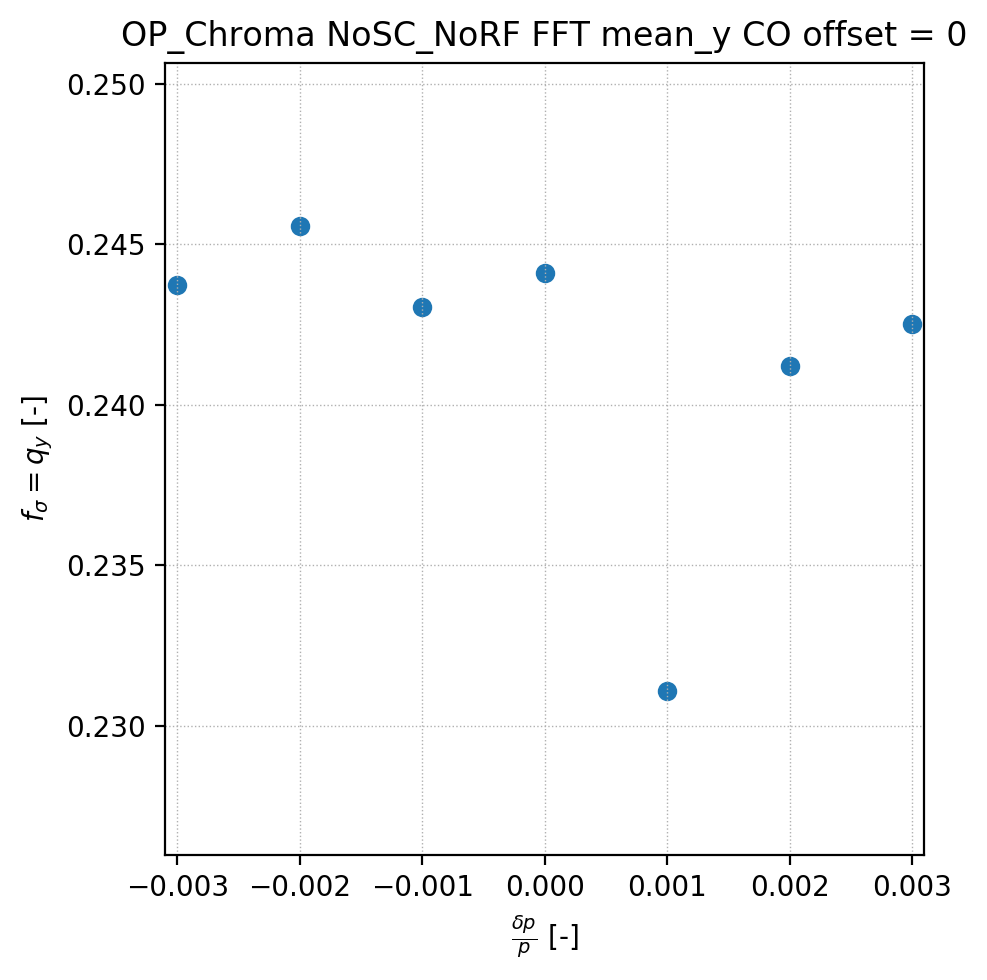

In [22]:
fig1 = plt.figure(facecolor='w', edgecolor='k');
ax1 = fig1.add_subplot(111);

tit = main_label + ' ' + sc + ' FFT mean_y CO offset = ' + CO_offset
ax1.set_title(tit);

ax1.set_ylabel(r'$f_{\sigma} = q_y$ [-]');
ax1.set_xlabel(r'$\frac{\delta p}{p}$ [-]');

dps = [-3E-3, -2E-3, -1E-3, 0, 1E-3, 2E-3, 3E-3];

ax1.scatter(dps, f_sig_y);
ax1.grid(lw=0.5, ls=':');
ax1.set_xlim(-3.1E-3,3.1E-3);
#ax1.set_ylim(0.215, 0.245);

savename = save_folder + 'qy.png'
plt.tight_layout()
plt.savefig(savename, dpi = 800);

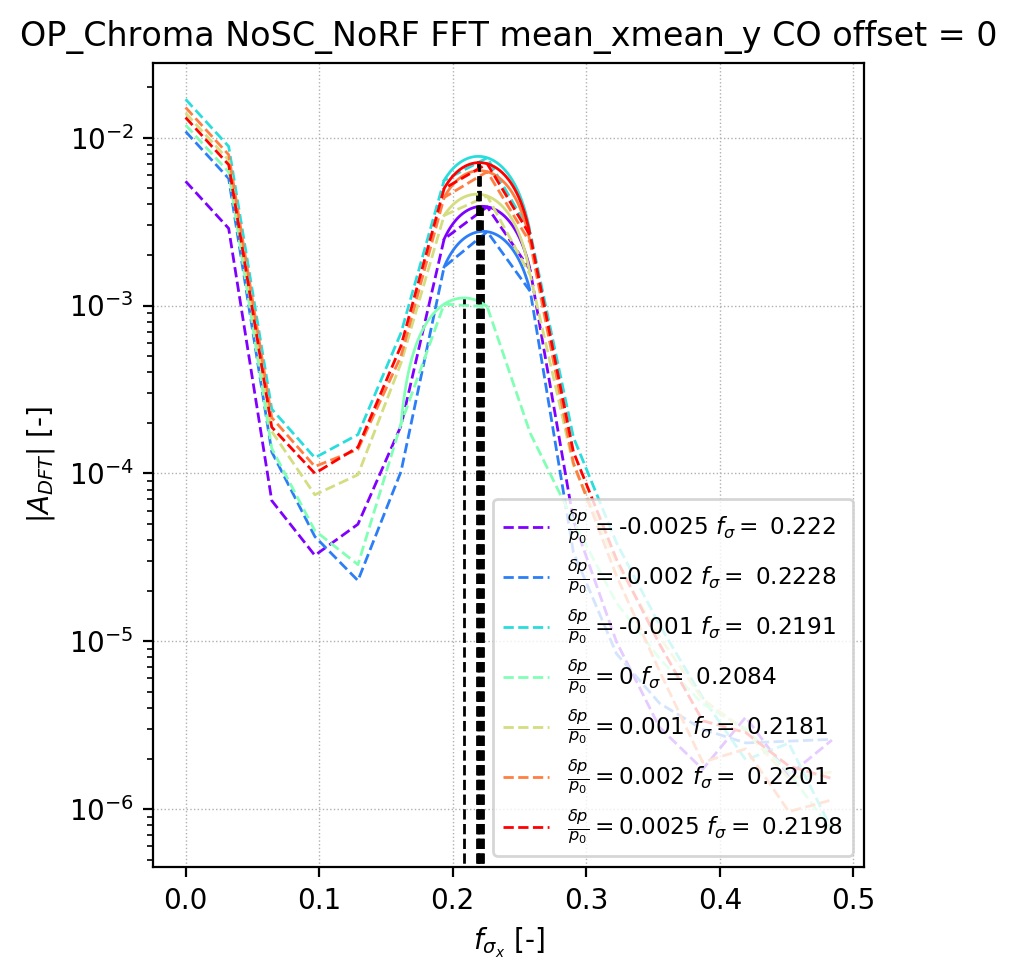

In [23]:
# Store envelope oscillation frequencies
f_sig_x = []

fig1 = plt.figure(facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)

tit = main_label + ' ' + sc + ' FFT mean_x' + parameter + ' CO offset = ' + CO_offset
ax1.set_title(tit);

ax1.set_ylabel(r'$|A_{DFT}|$ [-]');
ax1.set_xlabel(r'$f_{\sigma_{x}}$ [-]');

N_turns = 31

hann=np.hanning(N_turns)
freq_h = np.fft.rfftfreq(N_turns)

colors = cm.rainbow(np.linspace(0, 1, len(ddo.keys())))
c_it = int(0)

for key, value in sorted(ddo.iteritems()):

    ampl_h = np.abs(np.fft.rfft(ddo[key]['mean_x'][0]*hann))
    n = np.argmax(ampl_h[4:]) + 4
    popt, pcov = curve_fit(quadratic,freq_h[n-1:n+2],ampl_h[n-1:n+2])
    f_range = np.arange(freq_h[n-1],freq_h[n+1],0.001)
    f_max = -1*popt[1]/(2*popt[0])
    a_max = quadratic(f_max,popt[0],popt[1],popt[2])
    lab_ =  r'$\frac{\delta p}{p_0}=$' + str(key) + ' $f_\sigma = $ '+ str(round(f_max,4))
    plt.semilogy(freq_h,ampl_h,'b', label = lab_, color=colors[c_it], ls='--')
    plt.semilogy([f_max, f_max], [0, a_max],'--k')
    plt.semilogy(f_range,quadratic(f_range,popt[0],popt[1],popt[2]), color=colors[c_it])
    f_max = -1*popt[1]/(2*popt[0])
    c_it = c_it + 1
        
    f_sig_x.append(f_max)
    qx_fft.append(f_max)
    
ax1.legend(fontsize='small', loc=4)
ax1.grid(lw=0.5, ls=':')

savename = save_folder + 'x_fft.png'
plt.tight_layout()
plt.savefig(savename, dpi = 800);

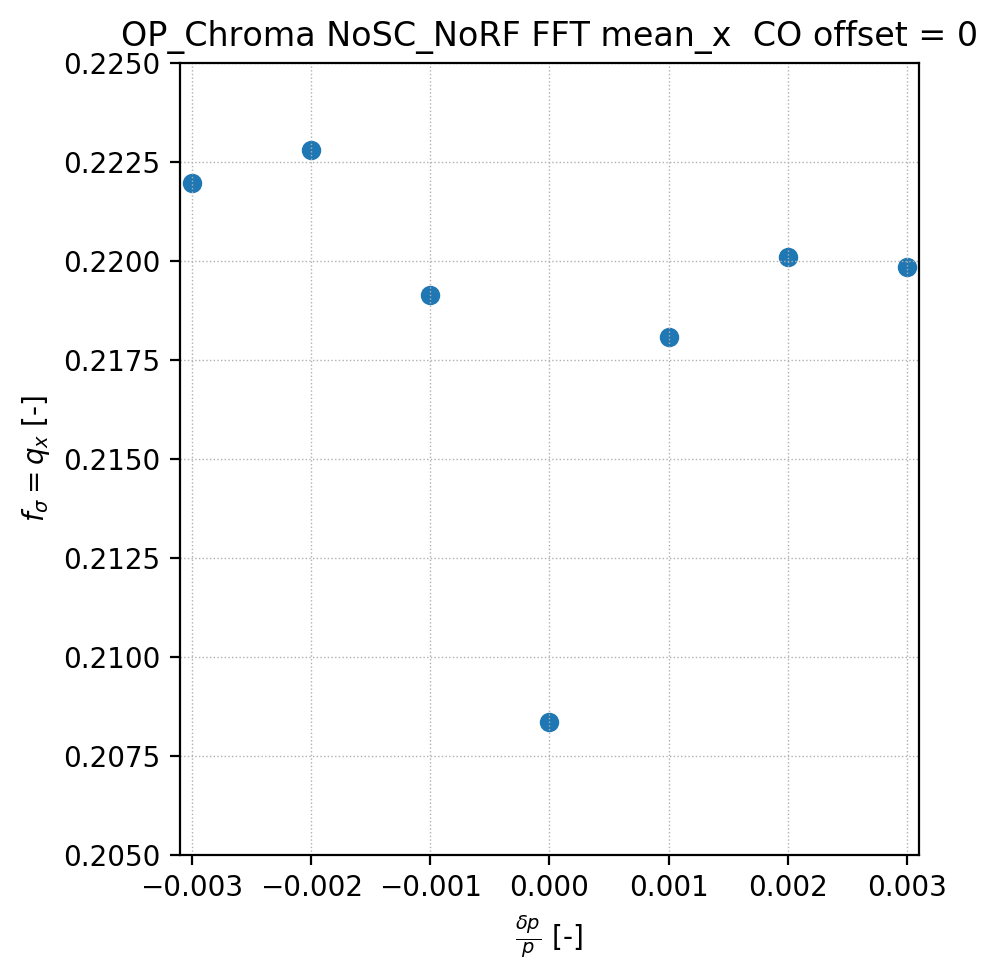

In [24]:
fig1 = plt.figure(facecolor='w', edgecolor='k');
ax1 = fig1.add_subplot(111);

tit = main_label + ' ' + sc + ' FFT mean_x  CO offset = ' + CO_offset
ax1.set_title(tit);

ax1.set_ylabel(r'$f_{\sigma} = q_x$ [-]');
ax1.set_xlabel(r'$\frac{\delta p}{p}$ [-]');

dps = [-3E-3, -2E-3, -1E-3, 0, 1E-3, 2E-3, 3E-3];
ax1.scatter(dps, f_sig_x);
ax1.grid(lw=0.5, ls=':');
ax1.set_xlim(-3.1E-3,3.1E-3);
ax1.set_ylim(0.205, 0.225);

savename = save_folder + 'qx.png'
plt.tight_layout()
plt.savefig(savename, dpi = 800);

# Calculate tunes using NAFF

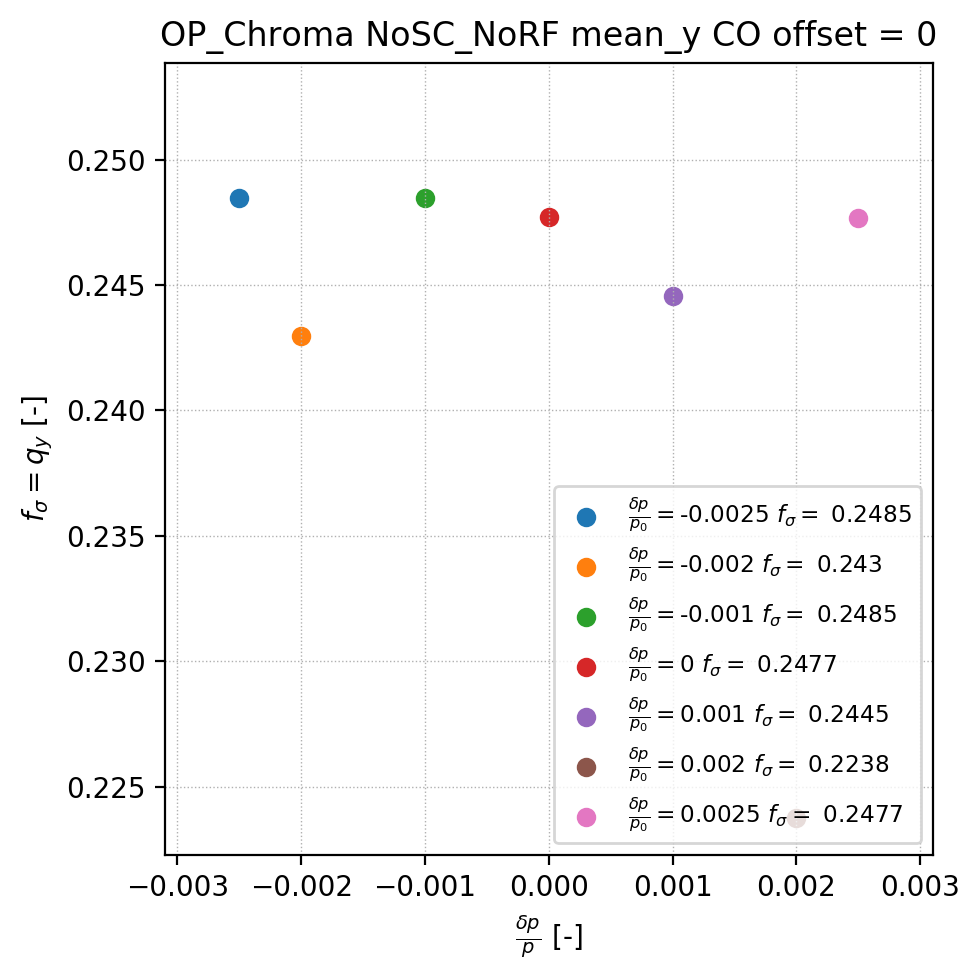

In [25]:
parameter = 'mean_y'
        
fig1 = plt.figure(facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)

tit = main_label + ' ' + sc + ' ' + parameter + ' CO offset = ' + CO_offset
ax1.set_title(tit);

ax1.set_ylabel(r'$f_{\sigma} = q_y$ [-]');
ax1.set_xlabel(r'$\frac{\delta p}{p}$ [-]');

ax1.grid(lw=0.5, ls=':');
ax1.set_xlim(-3.1E-3,3.1E-3);
#ax1.set_ylim(0.215, 0.245);

skiptrns= 4
N_turns = 31 - skiptrns

colors = cm.rainbow(np.linspace(0, 1, len(ddo.keys())))
c_it = int(0)

for key, value in sorted(ddo.iteritems()):    
    y = (ddo[key][parameter][0]-np.mean(ddo[key][parameter][0]))
    try:
        if key == 0.0: 
            skiptrns = 3
            N_turns = 31 - skiptrns
        elif key == 0.001: 
            skiptrns = 3
            N_turns = 31 - skiptrns
        elif key == 0.002: 
            skiptrns = 3
            N_turns = 31 - skiptrns
        elif key == 0.003: 
            skiptrns = 3
            N_turns = 31 - skiptrns
        #print skiptrns
        freq = pnf.naff(y, turns=N_turns, nterms=1, skipTurns=skiptrns, getFullSpectrum=False, window=1)[0][1]
        lab_ =  r'$\frac{\delta p}{p_0}=$' + str(key) + ' $f_\sigma = $ '+ str(round(freq,4)) 
        ax1.scatter(float(key), freq, label=str(lab_))
    except IndexError:
        continue 

        
    f_sig_x.append(freq)
    qy_naff.append(freq)
    
ax1.legend(fontsize='small', loc=4)
ax1.grid(lw=0.5, ls=':')

savename = save_folder + 'qy_naff.png'
plt.tight_layout()
plt.savefig(savename, dpi = 800);

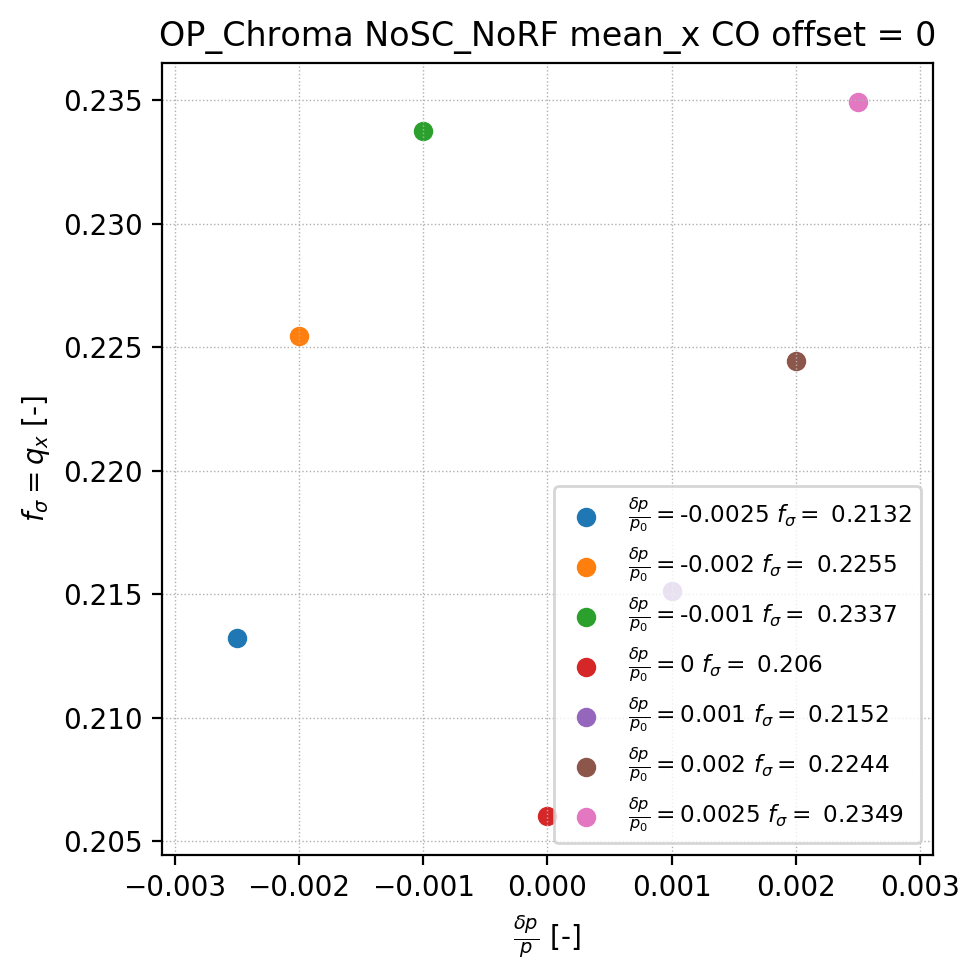

In [26]:
parameter = 'mean_x'
        
fig1 = plt.figure(facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)

tit = main_label + ' ' + sc + ' ' + parameter + ' CO offset = ' + CO_offset
ax1.set_title(tit);

ax1.set_ylabel(r'$f_{\sigma} = q_x$ [-]');
ax1.set_xlabel(r'$\frac{\delta p}{p}$ [-]');

ax1.grid(lw=0.5, ls=':');
ax1.set_xlim(-3.1E-3,3.1E-3);
#ax1.set_ylim(0.205, 0.225);

skiptrns= 6
N_turns = 31 - skiptrns

colors = cm.rainbow(np.linspace(0, 1, len(ddo.keys())))
c_it = int(0)

for key, value in sorted(ddo.iteritems()):    
    y = (ddo[key][parameter][0]-np.mean(ddo[key][parameter][0]))
    try:
        freq = pnf.naff(y, turns=N_turns, nterms=1, skipTurns=skiptrns, getFullSpectrum=False, window=1)[0][1]
        lab_ =  r'$\frac{\delta p}{p_0}=$' + str(key) + ' $f_\sigma = $ '+ str(round(freq,4)) 
        ax1.scatter(float(key), freq, label=str(lab_))
    except IndexError:
        continue 
        
    f_sig_x.append(freq)
    qx_naff.append(freq)
    
ax1.legend(fontsize='small', loc=4)
ax1.grid(lw=0.5, ls=':')

savename = save_folder + 'qx_naff.png'
plt.tight_layout()
plt.savefig(savename, dpi = 800);

# Compare different calculated tunes

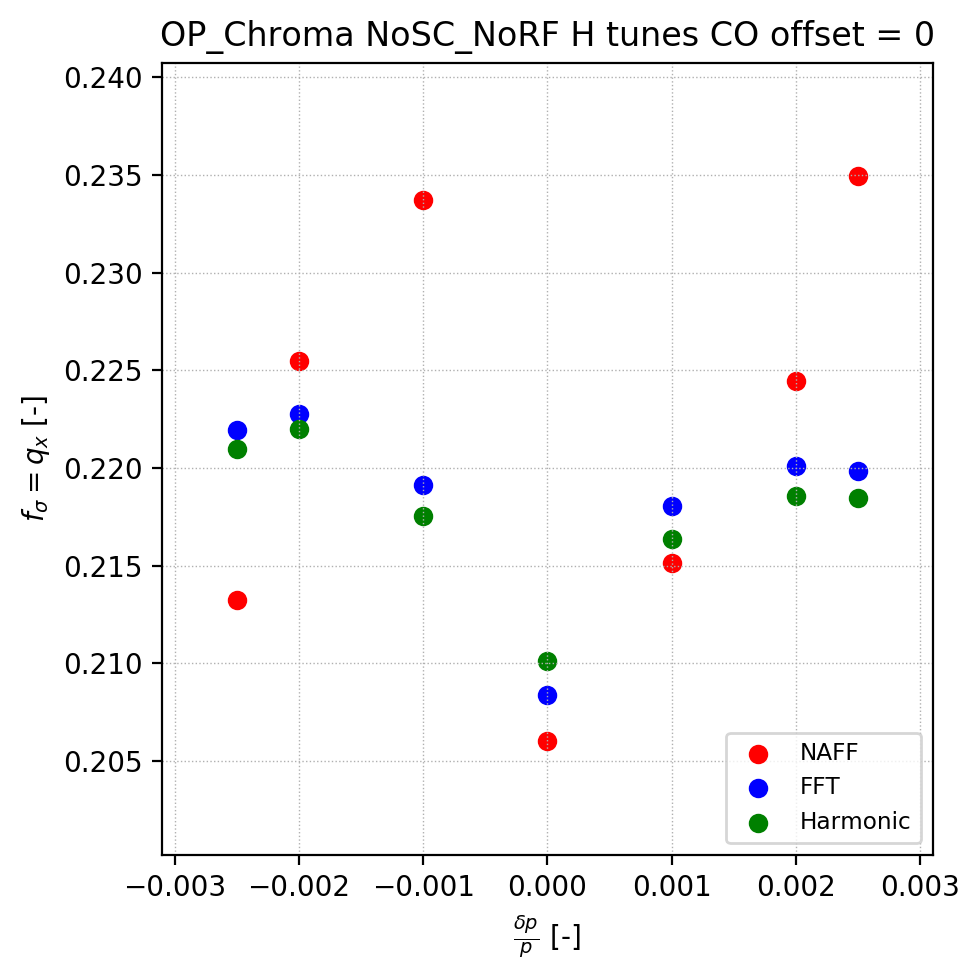

In [29]:
fig1 = plt.figure(facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)

tit = main_label + ' ' + sc + ' H tunes CO offset = ' + CO_offset
ax1.set_title(tit);

ax1.set_ylabel(r'$f_{\sigma} = q_x$ [-]');
ax1.set_xlabel(r'$\frac{\delta p}{p}$ [-]');

ax1.grid(lw=0.5, ls=':');
ax1.set_xlim(-3.1E-3,3.1E-3);
#ax1.set_ylim(0.205, 0.225);

dps = [-2.5E-3, -2E-3, -1E-3, 0, 1E-3, 2E-3, 2.5E-3];

ax1.scatter(dps, qx_naff, label='NAFF', color='r');
ax1.scatter(dps, qx_fft, label='FFT', color='b');
ax1.scatter(dps, qx_harmonic, label='Harmonic', color='g');

ax1.legend(fontsize='small', loc=4)
ax1.grid(lw=0.5, ls=':')

savename = save_folder + 'qx_cf.png'
plt.tight_layout()
plt.savefig(savename, dpi = 800);

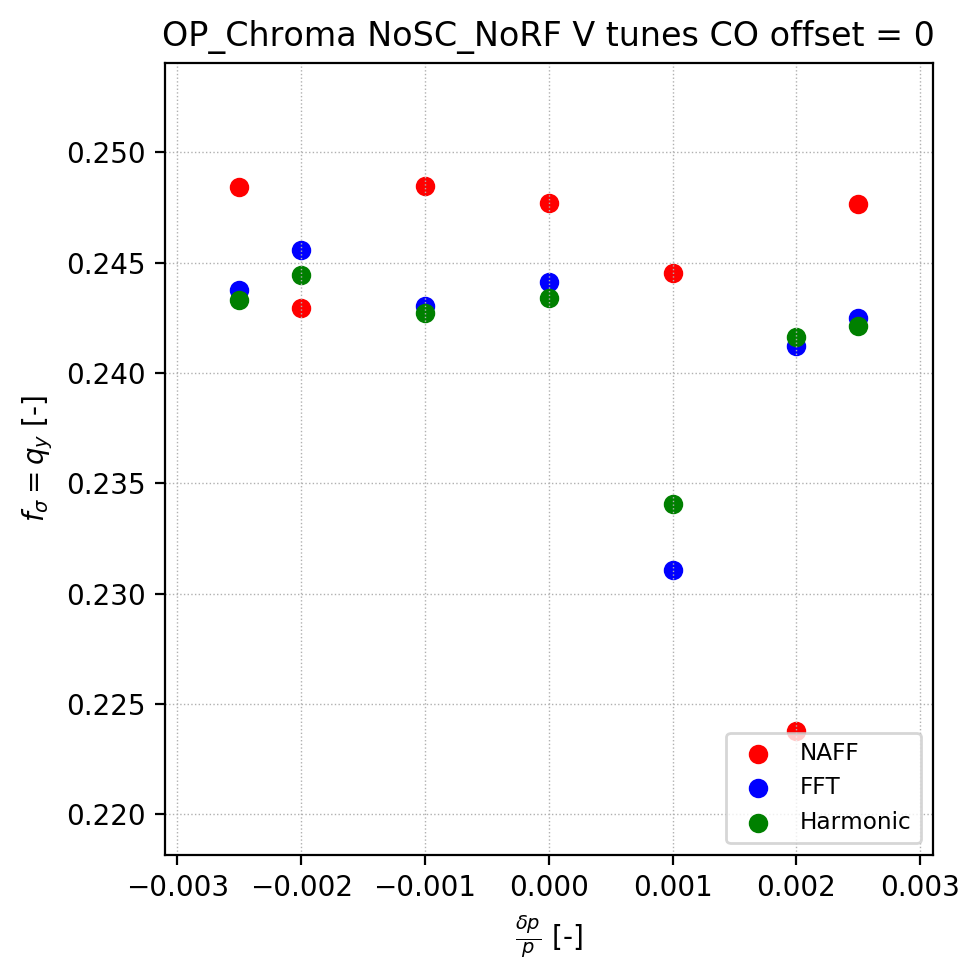

In [30]:
fig1 = plt.figure(facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)

tit = main_label + ' ' + sc + ' V tunes CO offset = ' + CO_offset
ax1.set_title(tit);

ax1.set_ylabel(r'$f_{\sigma} = q_y$ [-]');
ax1.set_xlabel(r'$\frac{\delta p}{p}$ [-]');

ax1.grid(lw=0.5, ls=':');
ax1.set_xlim(-3.1E-3,3.1E-3);
#ax1.set_ylim(0.205, 0.225);

dps = [-2.5E-3, -2E-3, -1E-3, 0, 1E-3, 2E-3, 2.5E-3];

ax1.scatter(dps, qy_naff, label='NAFF', color='r');
ax1.scatter(dps, qy_fft, label='FFT', color='b');
ax1.scatter(dps, qy_harmonic, label='Harmonic', color='g');

ax1.legend(fontsize='small', loc=4)
ax1.grid(lw=0.5, ls=':')

savename = save_folder + 'qy_cf.png'
plt.tight_layout()
plt.savefig(savename, dpi = 800);